<img src="images/cads-logo.png" width=200 align=left>
<img src="images/python-logo.png" width=200 align=right>

# NumPy
- [NumPy](#NumPy)
- [Introduction to NumPy](#Introduction-to-NumPy)
- [Creating Arrays](#Creating-Arrays)
    - [Nested Lists](#Nested-Lists)
    - [Array-Generating Functions](#Array-Generating-Functions)
        - [Empty Arrays](#Empty-Arrays)
        - [Ranges](#Ranges)
        - [Random Data](#Random-Data)
        - [Matrix Creation](#Matrix-Creation)
        - [Data Types](#Data-Types)
        - [Shapes](#Shapes)
    - [Exercises](#Exercises)
        - [Exercise 1](#Exercise-1)
        - [Exercise 2](#Exercise-2)
        - [Exercise 3](#Exercise-3)
        - [Exercise 4](#Exercise-4)
        - [Exercise 5](#Exercise-5)
- [Manipulating arrays](#Manipulating-arrays)
    - [Indexing](#Indexing)
    - [Slicing](#Slicing)
    - [Preserving Dimensions](#Preserving-Dimensions)
    - [Fancy Indexing](#Fancy-Indexing)
    - [Assigning Values to Subarrays](#Assigning-Values-to-Subarrays)
    - [Exercises](#Exercises)
        - [Exercise 1](#Exercise-1)
        - [Exercise 2](#Exercise-2)
        - [Exercise 3](#Exercise-3)
        - [Exercise 4](#Exercise-4)
        - [Exercise 5](#Exercise-5)
- [Array Operations](#Array-Operations)
    - [Logical Operations](#Logical-Operations)
    - [Arithmetic](#Arithmetic)
    - [Aggregative Functions](#Aggregative-Functions)
    - [Vectorization](#Vectorization)
    - [Further Reading](#Further-Reading)
    - [Excercises](#Excercises)
        - [Exercise 1](#Exercise-1)
        - [Exercise 2](#Exercise-2)
        - [Exercise 3](#Exercise-3)
        - [Exercise 4](#Exercise-4)
        - [Exercise 5](#Exercise-5)
- [Advanced Manipulation](#Advanced-Manipulation)
    - [Reshaping and Transposing](#Reshaping-and-Transposing)
    - [Adding a new dimension with `newaxis`](#Adding-a-new-dimension-with-`newaxis`)
    - [Concatenation and Splitting](#Concatenation-and-Splitting)
    - [Exercises](#Exercises)
        - [Exercise 1](#Exercise-1)
        - [Exercise 2](#Exercise-2)
        - [Exercise 3](#Exercise-3)
        - [Exercise 4](#Exercise-4)
- [Additional Resources:](#Additional-Resources:)


In [95]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# see plot inside jupyter notebook cell
# %matplotlib notebook 

Exercis link:
    https://jamboard.google.com/d/1KEGTvudKdpAy-JE-ZwLkVQvoP9WrjazmY4d0-PEqieU/edit?usp=sharing

## Introduction to NumPy

Datasets can include collections of documents, images, sound clips, numerical measurements, or, really anything. Despite the heterogeneity, it will help us to think of all data fundamentally as arrays of numbers.

| Data type	    | Arrays of Numbers? |
|---------------|-------------|
|Images | Pixel brightness across different channels|
|Videos | Pixels brightness across different channels for each frame | 
|Sound | Intensity over time |
|Numbers | No need for transformation | 
|Tables | Mapping from strings to numbers |


Therefore, the efficient storage and manipulation of large arrays of numbers is fundamental to the process of doing data science. NumPy is a library specially designed to handle arrays of numerical data.

[NumPy](http://www.numpy.org/) is short for _numerical python_, and provides functions that are especially useful when you have to work with large arrays and matrices of numeric data, like matrix multiplications.  

The array object class is the foundation of NumPy, and NumPy arrays are much like nested lists in base Python. However, NumPy supports _vectorization_. This means that many operations in NumPy are written and compiled in C code rather than Python, making it much faster as we will see. _Vectorization_ takes a nested sequence of objects or numpy arrays as inputs and returns a single numpy array or a tuple of numpy arrays

Manual:
https://numpy.org/doc/stable/

## Creating Arrays

### Nested Lists

Arrays can be created from nested lists. The nesting determines the dimensions of the resulting array.

In [3]:
# Create array from lists:
lis = [[1,2,3,4,5],[6,7,8,9,10]]
ary = np.array(lis)
print(ary)
print(type(ary))

# now looks like a matrix instead of list

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
<class 'numpy.ndarray'>


Note that dimensions must be consistent. If nested lists do not have the same lengths, NumPy will create a 1-D array in which the elements are the sublists.

In [6]:
# if not same length
print(np.array([[1,2,3,4,5],[6,7,8,9]]))

[list([1, 2, 3, 4, 5]) list([6, 7, 8, 9])]


The most important attributes of an array are its shape and the number of dimensions.

In [7]:
ary.shape

(2, 5)

In [8]:
ary.ndim

2

In [11]:
ary.dtype
# integer 32 bit

dtype('int32')

In [17]:
list1 = [1123123124251361341,2,3]
np.array(list1).dtype
# integer 64 bit

dtype('int64')

### Array-Generating Functions
For larger arrays it is inpractical to initialize the data manually. Instead we can use one of the many functions in numpy that generate arrays of different forms. Some of the more common are:

#### Empty Arrays
When the intended shape of an array is known in advance but its values are not, we can use various functions to generate empty arrays.

In [18]:
# Create empty arrays with dimension 0
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [20]:
# arrays of 1
np.ones((3, 4), dtype=np.int8)

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int8)

In [22]:
# all with that value
np.full((3, 5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

A special case is the function `np.empty`, which does not initialize any values. It will reserve memory for the array but use whatever values are already stored there without reseting them. This can be a useful optimization for speed when creating extremely large arrays.

In [23]:
print(np.empty((2, 3)))
print(np.empty((7, 10)))

[[0. 0. 0.]
 [0. 0. 0.]]
[[0.00000000e+000 1.10983027e-311             nan 0.00000000e+000
  6.95283268e-310 1.03753786e-322 1.10983410e-311 1.11086004e-311
  1.11085557e-311 1.11086003e-311]
 [0.00000000e+000 1.10982653e-311 0.00000000e+000 0.00000000e+000
  1.10981516e-311 0.00000000e+000 3.69227268e-312 1.08646184e-311
  9.71874072e-312 2.54639495e-312]
 [9.38724727e-322             nan 1.10980380e-311 1.10983081e-311
  1.11085743e-311 1.10981519e-311 1.11086005e-311 1.10981519e-311
  1.11085738e-311 1.10981519e-311]
 [1.10981519e-311 1.10981519e-311 1.10981519e-311 1.11085905e-311
  1.10983081e-311 1.10981519e-311 1.11085968e-311 1.10981519e-311
  1.10983081e-311 1.10983081e-311]
 [1.10983082e-311 1.10983082e-311 1.10981519e-311 1.10983081e-311
  1.10983082e-311 1.10983082e-311 1.10981520e-311 1.10983082e-311
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 1.10984431e-311
  1.1098

#### Ranges
Numpy also has a number of functions to support creating number ranges, such as:

In [24]:
# Define endpoints and step size
np.arange(start=0,stop=10,step=1)

# result is array instead of list

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
np.arange(start=6,stop=15,step=2)

array([ 6,  8, 10, 12, 14])

In [26]:
np.arange(8)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [34]:
# Define endpoints and the number of elements
# linear spacing ,create numbers with equal spacing

np.linspace(start=1,stop=10,num=15)

array([ 1.        ,  1.64285714,  2.28571429,  2.92857143,  3.57142857,
        4.21428571,  4.85714286,  5.5       ,  6.14285714,  6.78571429,
        7.42857143,  8.07142857,  8.71428571,  9.35714286, 10.        ])

In [35]:
# Includes the endpoint by default (non-standard Python behavior!)
np.linspace(start=1,stop=10,num=15, endpoint = False)

array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. , 7.6, 8.2,
       8.8, 9.4])

#### Random Data
Arrays can also be initialized with random values. NumPy supports many different probability distributions.

In [73]:
# Uniform distribution, i.e. all values equally likely, 
# between low (inclusive) and high (exclusive)
np.random.seed(1234) # seed number
np.random.uniform(low=0,high=1,size=(3,3))

array([[0.19151945, 0.62210877, 0.43772774],
       [0.78535858, 0.77997581, 0.27259261],
       [0.27646426, 0.80187218, 0.95813935]])

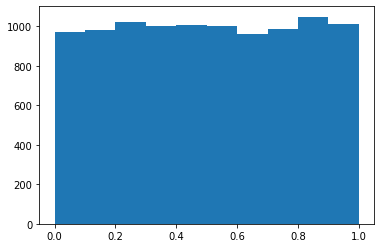

In [96]:
plt.hist(np.random.uniform(low=0, high=1, size=10000));

In [84]:
# Alias for np.random.uniform(low=0, high=1, ...)
np.random.random(size=(5,5))

array([[0.15139526, 0.33517466, 0.65755178, 0.07334254, 0.0550064 ],
       [0.32319481, 0.5904818 , 0.85389857, 0.28706243, 0.17306723],
       [0.13402121, 0.99465383, 0.17949787, 0.31754682, 0.5682914 ],
       [0.00934857, 0.90064862, 0.97724143, 0.55689468, 0.08477384],
       [0.33300247, 0.72842868, 0.14243537, 0.55246894, 0.27304326]])

In [86]:
# Normal (Gaussian) distribution centered around 'loc' (mean)
# with a standard deviation of 'scale'
np.random.normal(loc=5,scale=2 , size = (3,3))

# loc -mean
# scale - std

array([[3.07594234, 0.82946872, 8.86049353],
       [1.52930225, 7.42076741, 6.59487084],
       [4.24037843, 6.40512445, 3.29930746]])

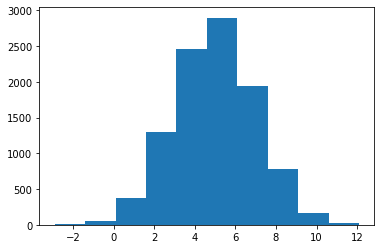

In [97]:
plt.hist(np.random.normal(loc=5, scale=2, size=10000));

Beyond distributions of uniformly distributed floating point values, NumPy also lets us generate random integers.

In [99]:
np.random.randint(low=1, high=100, size=(4, 4))

array([[12, 68, 91, 32],
       [98, 67, 95, 86],
       [18, 36, 33, 76],
       [15, 34,  5, 96]])

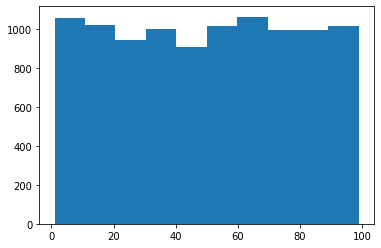

In [98]:
plt.hist(np.random.randint(low=1,high=100,size = 10000));

#### Data Types
Most, if not all, of these functions allow us to determine the data type with the `dtype` function argument, e.g.

In [102]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [100]:
np.zeros((2, 3), dtype=np.int16)

array([[0, 0, 0],
       [0, 0, 0]], dtype=int16)

Some of the most common supported data types are

| Data Type | Description |
| --------- | ----------- |
| `np.bool_` or `np.bool` | Boolean (True or False) stored as a byte
| `np.int8` | 	Byte (-128 to 127)
| `np.int16` | 	Integer (-32768 to 32767)
| `np.int32` | 	Integer (-2147483648 to 2147483647)
| `np.int64` | 	Integer (-9223372036854775808 to 9223372036854775807)
| `np.int_` or `np.int` | Default integer type (normally either int64 or int32)
| `np.uint8` | 	Unsigned integer (0 to 255)
| `np.uint16` | Unsigned integer (0 to 65535)
| `np.uint32` | Unsigned integer (0 to 4294967295)
| `np.uint64` | Unsigned integer (0 to 18446744073709551615)
| `np.float16` | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa
| `np.float32` | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa
| `np.float64` | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa
| `np.float_` or `np.float` | Default float type (normally either float64 or float32)

### Exercises

#### Exercise 1
Create a new 2x2 array without initializing entries.

In [ ]:
### your code here

In [109]:
np.zeros((2,2))
np.ones((2,2))
np.empty((2,2))
np.full((2,2),0)

array([[0, 0],
       [0, 0]])

#### Exercise 2
Create a new 3x2x4 array of ones and make sure they're floating point numbers.

In [ ]:
### your code here

In [113]:
# Nik Faiz
np.ones((3,2,4),dtype=np.float)

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[1., 1., 1., 1.],
        [1., 1., 1., 1.]]])

#### Exercise 3
Create a 1-D array of 20 evenly spaced elements between 3. (inclusive) and 10. (exclusive).

In [ ]:
### your code here

In [114]:
# Nik Faiz
np.linspace(3,10,20, endpoint = False)

array([3.  , 3.35, 3.7 , 4.05, 4.4 , 4.75, 5.1 , 5.45, 5.8 , 6.15, 6.5 ,
       6.85, 7.2 , 7.55, 7.9 , 8.25, 8.6 , 8.95, 9.3 , 9.65])

## Manipulating arrays

### Indexing
We can index elements in an array using square brackets and indices:

In [115]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])
print(v)
print(v[0])

[1 2 3 4]
1


In [128]:
M = np.random.randint(low=1, high=10, size=[3,3])
print(M)
# M is a matrix, or a 2 dimensional array, taking two indices 
print(M[2,0])  # rows, column

[[8 2 5]
 [5 7 4]
 [7 4 7]]
7


In [135]:
M = np.random.randint(low=1, high=10, size=[2,3,3])
print(M)
print(M[0, 2, 1])

[[[9 7 4]
  [8 1 4]
  [5 9 3]]

 [[3 5 5]
  [4 3 8]
  [7 8 8]]]
9


### Slicing
Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation, marked by the colon (``:``) character.
The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array ``x``, use this:
``` python
x[start:stop:step]
```

Slicing follows the typical Python convention of excluding the stop-index. If any of these are unspecified, they default to the values ``start=0``, ``stop=<size_of_dimension>``, ``step=1``. 

In [137]:
v = np.arange(10)
print(v)
print(v[3:7])
print(v[5:])
print(v[1:10:3])
print(v[::2])

[0 1 2 3 4 5 6 7 8 9]
[3 4 5 6]
[5 6 7 8 9]
[1 4 7]
[0 2 4 6 8]


The second `:` is not unnecessary if no step is specified, i.e. `v[:]` is equivalent to `v[::]`

In [138]:
print(v[:])
print(v[::])

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


Like before, we can index multidimensional arrays by using slices for each dimension.

In [139]:
M = np.random.randint(low=1, high=10, size=(5, 5))
print(M)
print()
print(M[0:2, 3:5])
print()
print(M[::2, 0:2])

[[9 9 5 5 4]
 [2 9 1 9 7]
 [6 9 9 2 9]
 [2 3 6 7 3]
 [4 5 4 8 8]]

[[5 4]
 [9 7]]

[[9 9]
 [6 9]
 [4 5]]


If we omit an index of a multidimensional array, it assumes all of the following dimensions should be indexed fully. For example, indexing a 2-D matrix with only one index slice will return all columns of the specified rows.

In [141]:
print(M[3])
print(M[3,:])
print(M[3,])

[2 3 6 7 3]
[2 3 6 7 3]
[2 3 6 7 3]


Note that this can get confusing as there is no way to reverse this, e.g. extracting all rows for specified columns must be done with a colon `:`.

In [142]:
print(M[:,4])

[4 7 9 3 8]


It is clearer to indicate the slices for all dimensions. If you are ever in a situation in which you are unsure of how many dimensions your array may have at runtime, you can use the ellipses `...` to indicate "Select all entries along all missing dimensions

In [146]:
M = np.random.randint(low=1, high=10, size=(3, 5, 5))
print(M)


[[[9 6 6 9 9]
  [8 9 2 1 1]
  [4 3 4 3 3]
  [7 8 8 1 1]
  [4 6 3 5 3]]

 [[5 7 2 5 1]
  [5 6 5 4 2]
  [6 8 6 1 7]
  [6 7 1 5 6]
  [7 7 9 5 3]]

 [[8 3 8 2 9]
  [5 6 9 3 9]
  [7 8 3 9 2]
  [9 2 4 5 7]
  [5 6 1 4 5]]]


In [147]:
# Print all rows and all columns of the second 2-D matrix in the 3-D stack
print(M[1, ...])
print()

# Print all rows of the third column of the first matrix
print(M[0, ..., 2])

[[5 7 2 5 1]
 [5 6 5 4 2]
 [6 8 6 1 7]
 [6 7 1 5 6]
 [7 7 9 5 3]]

[6 2 4 8 3]


In the above example, Python recognizes that the first and the last index are given and induces that the ellipses stands for all dimensions (here only one) inbetween these two. Likewise, `v[2, 3, ..., 5]` specifies the indices for the first, second, and last dimension and extracts all entries for the dimensions inbetween. For this reason, an index tuple can have only one ellipses `...` to avoid ambiguity.

### Fancy Indexing
NumPy permits several fancy indexing options. First, we can combine slices with indices or lists of indices.

In [153]:
M = np.random.randint(low=1, high=10, size=(5, 5))
print(M)

[[6 1 5 1 1]
 [4 5 8 4 5]
 [9 1 3 8 7]
 [2 5 7 3 8]
 [9 5 4 1 8]]


In [154]:
print(M[2, 3:5])
print()

# Notice the preservation of dimensionality
print(M[3:5, [2, 4]])

[8 7]

[[7 8]
 [4 8]]


We can also use multiple sets of indices to extract multiple values. For example, `M[[x1, x2], [y1, y2]]` will extract the values at coordinates (x1, y1) and (x2, y2) of the matrix M.

In [155]:
print(M[[1, 2], [3, 4]])

[4 7]


Note that we cannot use this method to extract entire rows and columns simultaneously. If we want, for example, columns 3 and 4 of rows 1 and 2 we need to index the matrix with multiple square bracket sets.

In [158]:
print(M[[1, 2], :][:, [3, 4]])

[[5 5]
 [1 7]]


Lastly, we can use boolean masks to select specific values. Masks must have the same shape as the array itself. Note that NumPy will automatically convert base Python into NumPy arrays. That means that a mask can be anything that can be converted into an array, e.g. a (nested) list.

In [161]:
# Mask - return if true

v = np.linspace(start=1, stop=10, num=4, endpoint=True)
print(v)
print()
print(v[[True, False, True, True]])
print(v[v>7])

[ 1.  4.  7. 10.]

[ 1.  7. 10.]
[10.]


Indexing with boolean masks will always flatten arrays, i.e. all shape information will be lost.

In [163]:
mask = np.array([
    [False, False, False, False, False], 
    [False, False, False, False, False], 
    [True,  False, True, False, False], 
    [True,  True,  False, False, False], 
    [False, False, False, False, False]])
print(M)
print()
print(M[mask])
print(M[mask].shape) # return linear line

[[6 1 5 1 1]
 [4 5 8 4 5]
 [9 1 3 8 7]
 [2 5 7 3 8]
 [9 5 4 1 8]]

[9 3 2 5]
(4,)


We can negate boolean NumPy arrays with `~`

In [164]:
# ~ is like not equal to

v = np.arange(5)
mask = np.array([True, True, False, False, False])
print(v[mask])
print(v[~mask])

[0 1]
[2 3 4]


Using ur browser for AI: 
https://teachablemachine.withgoogle.com/

example: 
- pic without phone
- pic w/o phone

### Assigning Values to Subarrays

We can assign new values to elements in an array using any of the indexing methods shown above.

In [177]:
M = np.zeros((5, 5), dtype=np.int)
print(M)
M[0,0] = 1
print(M)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
[[1 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [178]:
# also works for rows and columns
M[1,:] = 2
M[:,2] = 3
print(M)

[[1 0 3 0 0]
 [2 2 3 2 2]
 [0 0 3 0 0]
 [0 0 3 0 0]
 [0 0 3 0 0]]


In [179]:
# simultaneous assignment of subarray
M[3:5, 2:5] = 4
print(M)

[[1 0 3 0 0]
 [2 2 3 2 2]
 [0 0 3 0 0]
 [0 0 4 4 4]
 [0 0 4 4 4]]


Even though boolean masks flatten outputs when used for selection, they can be used to assign values while <u>retaining the shape.</u>

In [180]:
mask = np.array([
    [False, False, False, False, False], 
    [False, False, False, False, False], 
    [True,  False, True,  False, False], 
    [True,  True,  False, False, False], 
    [False, False, False, False, False]])
M[mask] = 5
print(M)
print()

M[M==0]=8
print(M)

[[1 0 3 0 0]
 [2 2 3 2 2]
 [5 0 5 0 0]
 [5 5 4 4 4]
 [0 0 4 4 4]]

[[1 8 3 8 8]
 [2 2 3 2 2]
 [5 8 5 8 8]
 [5 5 4 4 4]
 [8 8 4 4 4]]


Assigned values are broadcast to the necessary shape as per the broadcasting rules above. This means that for assignment with indices/slices, they are broadcast to the subarray shape

In [182]:
np.array([[-1, -2], [-3, -4]])

array([[-1, -2],
       [-3, -4]])

In [181]:
M[0:2, 3:5] = np.array([[-1, -2], [-3, -4]])
print(M)

[[ 1  8  3 -1 -2]
 [ 2  2  3 -3 -4]
 [ 5  8  5  8  8]
 [ 5  5  4  4  4]
 [ 8  8  4  4  4]]


For boolean masks, the values must be either a scalar value, i.e. a 0-D array, or a 1-D array. Note that after assignment, the original shape of the array is retained.

In [183]:
mask = np.array([
    [True,  False, True,  False, True ], 
    [False, True,  False, True,  False], 
    [False, False, False, False, False], 
    [False, False, False, False, False], 
    [False, False, False, False, False]])
M[mask] = [10, 11, 12, 13, 14]
print(M)

[[10  8 11 -1 12]
 [ 2 13  3 14 -4]
 [ 5  8  5  8  8]
 [ 5  5  4  4  4]
 [ 8  8  4  4  4]]


We can extract the indices of a boolean mask with `np.where(...)`. This will return a tuple of arrays indicating the coordinates where the mask evaluates to `True`.

In [184]:
# np.where  is the coordinate when it's true
mask = np.array([
    [True,  False, True,  False, True ], 
    [False, True,  False, True,  False], 
    [False, False, False, False, False], 
    [False, False, False, False, False], 
    [False, False, False, False, False]])
print(mask)
print()
print(np.where(mask))

[[ True False  True False  True]
 [False  True False  True False]
 [False False False False False]
 [False False False False False]
 [False False False False False]]

(array([0, 0, 0, 1, 1], dtype=int64), array([0, 2, 4, 1, 3], dtype=int64))


In [189]:
print(M)
np.where(M==8)

[[10  8 11 -1 12]
 [ 2 13  3 14 -4]
 [ 5  8  5  8  8]
 [ 5  5  4  4  4]
 [ 8  8  4  4  4]]


(array([0, 2, 2, 2, 4, 4], dtype=int64),
 array([1, 1, 3, 4, 0, 1], dtype=int64))

### Exercises
Unless otherwise stated, the following exercises are based on the following array. Keep in mind, with regards to the phrasing, that Python begins indexing at 0, i.e. the 'first' element is the element with index 0.

In [ ]:
np.random.seed(100)
M = np.random.randint(low=-5, high=5, size=(5, 5))
print(M)

#### Exercise 1
Extract the third column of the matrix `M`

In [ ]:
### your code here

In [191]:
M[:,2]

array([11,  3,  5,  4,  4])

#### Exercise 2
Extract only the odd-indexed rows and columns, i.e. those with indices 1 and 3, of `M`

In [ ]:
### your code here

In [196]:
print(M[1::2,1::2])
print(M[[1, 3], :][:, [1, 3]])

print(M[[1,3],[1,3]])

[[13 14]
 [ 5  4]]
[[13 14]
 [ 5  4]]
[13  4]


#### Exercise 3
Extract the positive values of the matrix `M`

In [ ]:
### your code here

In [197]:
M[M>0]

array([10,  8, 11, 12,  2, 13,  3, 14,  5,  8,  5,  8,  8,  5,  5,  4,  4,
        4,  8,  8,  4,  4,  4])

#### Exercise 4
Replace all negative values of matrix `M` with 0

In [ ]:
### your code here

In [199]:
M[M<0] = 0
M

array([[10,  8, 11,  0, 12],
       [ 2, 13,  3, 14,  0],
       [ 5,  8,  5,  8,  8],
       [ 5,  5,  4,  4,  4],
       [ 8,  8,  4,  4,  4]])

## Array Operations
Apart from just manipulating array contents directly, we can also perform operations on them, such a logical, arithmetical, or aggregative operations.

### Logical Operations
Logical operations on NumPy arrays evaluate a condition on every individual entry and return boolean arrays of the same shape as the original array.

In [200]:
M = np.random.randint(low=-10, high=10, size=(5, 5))
print(M)
print(M>=0)



[[  4  -8   9   6  -8]
 [-10 -10  -2   5  -9]
 [ -8   2   7   2   4]
 [ -2   6  -6  -9  -2]
 [ -6  -8   7   9  -9]]
[[ True False  True  True False]
 [False False False  True False]
 [False  True  True  True  True]
 [False  True False False False]
 [False False  True  True False]]


We can, of course, use the resulting boolean array as a selection mask

In [202]:
M[M >= 0]

array([4, 9, 6, 5, 2, 7, 2, 4, 6, 7, 9])

and to assign new values

In [203]:
M[M > 0] = 20
print(M)

[[ 20  -8  20  20  -8]
 [-10 -10  -2  20  -9]
 [ -8  20  20  20  20]
 [ -2  20  -6  -9  -2]
 [ -6  -8  20  20  -9]]


When using boolean arrays in conditions, for example `if` statements and other boolean expressions, one needs to use `any` or `all`, which requires that any or all elements in the array evalute to `True`:

In [204]:
# any or all

M = np.array([[ 1,  4],[ 9, 16]])
print(M)
print()
print((M > 5).any())
print()
print((M > 5).all())

[[ 1  4]
 [ 9 16]]

True

False


Base Python doesn't play well with boolean arrays consisting of multiple values.

In [205]:
# Uncomment to run and see Exception
if M > 5:
    print("Hello World")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [206]:
#any
if (M > 5).any():
    print("At least one element in M is larger than 5")
else:
    print("No element in M is larger than 5")

At least one element in M is larger than 5


In [207]:
#all
if (M > 5).all():
    print("All elements in M are larger than 5")
else:
    print("Not all elements in M are larger than 5")

Not all elements in M are larger than 5


### Arithmetic
Arithemtical operations on NumPy arrays are performed on an element-by-element basis. We can either perform this arithmetic between an array and a scalar, i.e. a single number, or between two arrays.

In the case of a scalar, the identical operation is applied to every single array entry.

In [208]:
v1 = np.arange(0, 5)
v1

array([0, 1, 2, 3, 4])

In [209]:
v1 * 2

array([0, 2, 4, 6, 8])

In [211]:
v1+2

array([2, 3, 4, 5, 6])

In [212]:
A = np.random.randint(low=-5, high=5, size=(3, 3))
print(A)
print()
print(A * 2)
print()
print(A + 2)
print()
print(A ** 2)

[[-3 -1 -3]
 [-3 -4  3]
 [-5  3 -3]]

[[ -6  -2  -6]
 [ -6  -8   6]
 [-10   6  -6]]

[[-1  1 -1]
 [-1 -2  5]
 [-3  5 -1]]

[[ 9  1  9]
 [ 9 16  9]
 [25  9  9]]


When we add, subtract, multiply and divide arrays with each other, the default behaviour is **element-wise operations**:

In [213]:
v1 = np.arange(start=5, stop=10)
v2 = np.arange(start=0, stop=5)
print(v1)
print(v2)
print(v1 + v2)
print(v1 * v2)
print(v1 ** v2)

[5 6 7 8 9]
[0 1 2 3 4]
[ 5  7  9 11 13]
[ 0  6 14 24 36]
[   1    6   49  512 6561]


In [ ]:
A = np.random.randint(low=-5, high=5, size=(3, 3))
B = np.random.randint(low=-5, high=5, size=(3, 2))
A+B # Error  - numpy broadcasting error - google numpy broadcasting

### Aggregative Functions
We can also aggregate over arrays using several built-in functions. For example,

In [215]:
A = np.random.randint(low=0, high=10, size=(2, 2))
print(A)
print()
print(np.sum(A))

[[9 4]
 [2 8]]

23


In [228]:
list1 = [[6,7],[np.nan,7]]
c = np.array(list1)
np.nansum(c)

# if got none/Nan, will skip it instead of error
# c[1,0] = None
# np.sum(c)

20.0

In [234]:
A = np.random.randint(low=-5, high=5, size=1000)
np.percentile(A,100)


4.0

NumPy provides many aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value.
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

"`NaN`-safe" means that the function ignores any missing values, e.g.

In [241]:
np.random.seed(1234)
A = np.random.randint(low=0, high=10, size=(2, 2))
print(A)
np.sum(A,axis=0)  # 0 sum by column, 1 sum by row

[[3 6]
 [5 4]]


array([ 8, 10])

In [235]:
A = np.array([[1, 2], [3, np.nan]])
print(A)
print()
print(np.sum(A))
print(np.nansum(A))

[[ 1.  2.]
 [ 3. nan]]

nan
6.0


We can apply these functions either to entire arrays or individual axes. To understand how the `axis` parameter works it's best to stop thinking of arrays as rows and columns but as nested lists. `axis=0` performs an operation along the outer-most dimension, e.g. if 

$$A = \begin{matrix} [[1 & 5] \\ [2 & 2]] \end{matrix}$$

then the two arrays (1, 5) and (2, 2) would be added together elementwise, resulting in (3, 7). For `axis=1`, the individual elements of each array in the next layer would be added together, i.e. (1 + 5, 2 + 2) = (6, 4).

In [242]:
A = np.array([[1, 5], [2, 2]])
print(A)
print()
print(np.sum(A, axis=0)) # by column
print()
print(np.sum(A, axis=1)) # by row  - follow the dimension

[[1 5]
 [2 2]]

[3 7]

[6 4]


In [244]:
A = np.random.randint(low=0, high=10, size=(2, 2, 3))
print(A)
print(np.sum(A, axis=2))

[[[2 0 5]
  [2 6 3]]

 [[7 0 9]
  [0 3 2]]]
[[ 7 11]
 [16  5]]


### Vectorization

Vectorization in NumPy refers to the implementation of mathematical **operations in compiled C code** rather than interpreted Python code. This provides a substantial performance boost. Furthermore, due to NumPy's more intuitive treatment of array arithmetic, as much of a program's math should be formulated in terms of NumPy operations. Many packages, like Pandas, SciPy, and Scikit-Learn make use of this vectorization.

In [245]:
# More intuitive treatment of lists versus arrays
lis = [1,2,3,4,5]
print(lis + lis)

ary = np.array(lis)
print(ary + ary)

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
[ 2  4  6  8 10]


Achieving the same result in base Python requires loops

In [ ]:
[x+x for x in lis] # for loop considered not efficient

This takes substantially longer. NumPy is faster by a factor of over 100 when adding large lists together.

In [249]:
lis = [i for i in range(10000)]
ary = np.array(lis)
%timeit [x+x for x in lis]
%timeit ary + ary

727 µs ± 45.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
11.5 µs ± 366 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


for more info: https://www.youtube.com/watch?v=EEUXKG97YRw&ab_channel=PyCon2015

free book about data science:https://jakevdp.github.io/PythonDataScienceHandbook/

We call operations on numpy arrays **vectorized**. This feature is the reason NumPy sits at the base of so many numerical and scientific Python libraries, e.g. scipy, scikit-learn and Pandas.

### Excercises

#### Exercise 1
Create two 8x8 arrays of random integers. The first should have only negative numbers between -10 and -1 (inclusive) and the second should have only positive numbers between 1 and 10 (inclusive). Add them together and save the result as a variable `A`.

In [ ]:
### Your code here

In [264]:
# Nik Faiz
np.random.seed(1234)
a = np.random.randint(-10,0,(8,8))
b = np.random.randint(1,10+1,(8,8))
A = a+b
A

array([[ 0, -1,  0, -3,  6,  9, -1,  5],
       [ 2,  6,  6, -5,  5, -9,  9, -1],
       [ 2, -8, -2,  2, -2, -1,  5, -5],
       [ 7, -2, -5, -3, -6, -3, -2,  1],
       [-4,  7, -7,  1,  0,  0, -1, -8],
       [ 0,  4,  0,  1, -1,  4,  7,  0],
       [ 5,  8,  5, -4, -8, -5, -2, -4],
       [-2,  6,  5, -1,  2, -3,  6, -3]])

#### Exercise 2
Calculate the mean of the entire matrix `A`.

In [ ]:
### Your code here

In [265]:
np.mean(A)

0.21875

#### Exercise 3
How many of the entries of the resulting matrix `A` are positive, negative, and zero?

In [ ]:
### Your code here

In [274]:
# Nik Faiz
print(np.sum(A>0))
print(np.sum(A<0))
print(np.sum(A==0))

26
31
7


In [278]:
# Other answer (for positive only)

len(A[A>0])
np.count_nonzero(A>0)
A[A>0].size

26

#### Exercise 4
Calculate the mean of every row and column of the matrix `A`

In [ ]:
### Your code here

In [282]:
# Nik Faiz
print("Row: ",np.mean(A, axis = 1))
print("Column: ",np.mean(A, axis = 0))

Row:  [ 1.875  1.625 -1.125 -1.625 -1.5    1.875 -0.625  1.25 ]
Column:  [ 1.25   2.5    0.25  -1.5   -0.5   -1.     2.625 -1.875]


## Advanced Manipulation 

### Reshaping and Transposing
On disk, NumPy arrays are stored by their values and their shapes separately. That means we can change the shape of an array very quickly, regardless of the actual size. The array dimensions must match, i.e. the new shape must have space for exactly as many elements as the old shape. 

Elements are reshaped in an "inside-out" fashion. That means the inner-most dimensions are filled with values first and then combined in the outer dimensions. In the context of 2D matrices, this means that values are set rows-first.

In [287]:
a = np.arange(12)
print(a)
print()
print(a.reshape(3, 4))
print()
print(a.reshape(6, 2))

[ 0  1  2  3  4  5  6  7  8  9 10 11]

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]


Alternatively, we can also transpose matrices. Transposing means that the order of dimensions become flipped, i.e. the first dimensions becomes the last, the last the first, etc. Consequently, transposing 1D arrays has no effect.

In [288]:
print(a)
print(a.transpose())

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11]


Transposing 2D arrays means that rows become columns and columns become rows.

In [290]:
A = np.arange(15).reshape(3, 5)
print(A)
print()
print(A.transpose())

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


For higher-dimensional arrays, the order of the dimensions reverses. Within this new shape, values are then set in the same <u>"inside-out" fashion</u>.

In [291]:
A = np.random.randint(low=-5, high=5, size=(2, 3, 4, 5, 6))
print(A.shape)
print()
print(A.transpose().shape)

(2, 3, 4, 5, 6)

(6, 5, 4, 3, 2)


Alternatively, we can also define how we want to reorder the dimensions.

In [292]:
# if we define the order of transpose

print(A.shape)
print()
print(A.transpose((0, 1, 2, 4, 3)).shape)

(2, 3, 4, 5, 6)

(2, 3, 4, 6, 5)


To help you understand what is happening here, it is easiest to picture this as creating an empty array with a specified shape and then filling it with the values of the original array, even though this isn't actually what happens "under the hood".

### Adding a new dimension with `newaxis`

With newaxis, we can insert new dimensions in an array, for example converting a vector to a column or row matrix.

In [294]:
v = np.arange(5)
print(v)
print(v.shape)
print()
v2 = v[np.newaxis, :]
print(v2)
print(v2.shape)
print()
v3 = v[:, np.newaxis]
print(v3)
print(v3.shape)
print()

[0 1 2 3 4]
(5,)

[[0 1 2 3 4]]
(1, 5)

[[[0]]

 [[1]]

 [[2]]

 [[3]]

 [[4]]]
(5, 1, 1)



### Concatenation and Splitting
We can concatenate arrays along given axes. In order to be concatenated, they must have the same number of dimensions and their shapes must match in all dimensions but the one being concatenated along

In [295]:
A = np.arange(10)
B = np.arange(20, 40).reshape((2,10))
print('A')
print(A)
print(A.shape)
print()
print('B')
print(B)
print(B.shape)
print()

A
[0 1 2 3 4 5 6 7 8 9]
(10,)

B
[[20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]]
(2, 10)



In [300]:
print(np.concatenate((A,A)))
print()
print(np.concatenate((B,B)))

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]

[[20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]]


By default, `np.concatenate` will combine arrays along `axis=0`. We can specify the axis along which to concatenate, however.

In [303]:
print(np.concatenate((B, B), axis=1))

[[20 21 22 23 24 25 26 27 28 29 20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39 30 31 32 33 34 35 36 37 38 39]]


While `np.concatenate` joins arrays along existing axes, `np.stack` combines them along new axes. This is equivalent to reshaping the arrays, e.g. with `np.newaxis` and then concatenating them along this new axis.

In [304]:
print(A)
print(A.shape)
print()
A2 = np.stack((A, A), axis=0)
print(A2)
print(A2.shape)
print()
A3 = np.stack((A, A), axis=1)
print(A3)
print(A3.shape)
print()
# newaxis at axis=1 and concatenate at axis=1
A4 = A[..., np.newaxis]
A4 = np.concatenate((A4, A4), axis=1)
print(A4)
print(A4.shape)

[0 1 2 3 4 5 6 7 8 9]
(10,)

[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]
(2, 10)

[[0 0]
 [1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]
 [7 7]
 [8 8]
 [9 9]]
(10, 2)

[[0 0]
 [1 1]
 [2 2]
 [3 3]
 [4 4]
 [5 5]
 [6 6]
 [7 7]
 [8 8]
 [9 9]]
(10, 2)


We can also split arrays along a certain axis into sections. We can either dictate how many equally sized parts the array should be split into or we can determine specifically where to split the array

In [305]:
A = np.arange(12)
print(A)
print()
# Split into 3 equally sized parts
print(np.split(A, 3))
print()
# Split at specific indices
print(np.split(A, (2, 3, 8)))

[ 0  1  2  3  4  5  6  7  8  9 10 11]

[array([0, 1, 2, 3]), array([4, 5, 6, 7]), array([ 8,  9, 10, 11])]

[array([0, 1]), array([2]), array([3, 4, 5, 6, 7]), array([ 8,  9, 10, 11])]


The `axis` argument allows us to determine along which axis to split the array

In [306]:
print(B)
print()
print(np.split(B, 2, axis=0))
print()
print(np.split(B, 2, axis=1))

[[20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]]

[array([[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]]), array([[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]])]

[array([[20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34]]), array([[25, 26, 27, 28, 29],
       [35, 36, 37, 38, 39]])]


### Exercises

#### Exercise 1
Let x be array
    
    [[1, 2, 3], 
     [4, 5, 6]].

Convert it to 
    
    [[1 4 2 5 3 6]]

In [ ]:
### Your code here

In [318]:
# Nik Faiz
x = np.array([[1,2,3],[4,5,6]])
x.transpose().reshape(1, 6)

array([[1, 4, 2, 5, 3, 6]])

#### Exercise 2
Let x be an array

    [[1, 2, 3]
     [4, 5, 6]]

and y be an array

    [[ 7,  8,  9]
     [10, 11, 12]]

Concatenate x and y so that a new array looks like

    [[1, 2, 3,  7,  8,  9]
     [4, 5, 6, 10, 11, 12]]

In [ ]:
### Your code here

In [321]:
# Nik Faiz
x = np.array([[1,2,3],[4,5,6]])
y = np.array([[7,8,9],[10,11,12]])
np.concatenate((x, y), axis=1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

#### Exercise 3
Let x be an array [1, 2, 3, ..., 9]. Split x into 3 arrays, each of which has 4, 2, and 3 elements in the original order.

In [ ]:
### Your code here

In [325]:
# Nik Faiz
x= np.arange(1,10)
np.split(x,(4,6))

[array([1, 2, 3, 4]), array([5, 6]), array([7, 8, 9])]

#### Exercise 4
Create a 8x8 matrix and fill it with a checkerboard pattern like below:
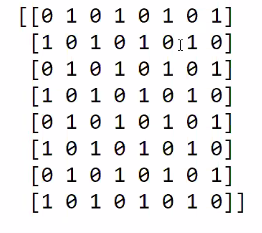


In [347]:
# Nik Faiz
x= np.zeros((8,8),dtype = int)

x[1::2,0::2] = 1
x[0::2,1::2] = 1
print(x)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]
